### Merge datasets

In [21]:
import os
import sys
import pandas as pd


data_path = os.path.join(os.getcwd(), '../data')
src_path = os.path.join(os.getcwd(), '../src')
sys.path.append(src_path)

import utils

In [22]:
df = pd.read_csv(os.path.join(data_path, 'cat_data.csv'))


---

### Collapse column names

In [23]:
cols = list(df.columns)
cols.sort()

In [24]:
import missingno as msno
    
# msno.matrix(df.loc[:, df.columns.str.contains(main_groups[0])])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.describe()

,percent_missing
count,235.000000
mean,20.897532
std,33.071179
min,0.000000
25%,0.000000
50%,0.202224
75%,48.837209
max,98.685541


In [25]:
coldf = pd.DataFrame(cols, columns=['name'])

In [26]:
def get_info_from_column(col):
    import re
    
    col = col.replace('Cata', 'cata')\
        .replace('Spa', 'spa')\
        .replace('Rate', 'rate')\
        .replace('Parl', 'parl')\
        .replace('Cong', 'cong')\
        .replace('Europ', 'europ')\
        .replace('Depu', 'depu')\
        .replace('Social', 'social')\
        .replace('Security', 'security')\

    fields = re.split(r'(?=_[A-Z][^A-Z])', col)
    return fields

In [27]:
def format_name(string):
    import re
    return '_'.join(re.findall(r'[A-Za-z]+', string)).lower()

In [28]:
def get_relevant_info_by_group(col):

    fields = get_info_from_column(col)
    l = len(fields)
    main = fields[0].lower()
    
    if 'culture' in main: sub = fields[2]; ind = fields[-1]
    elif 'economic' in main: sub = fields[1]; ind = fields[-1]
    elif 'education' in main: sub = fields[1]; ind = fields[-1]
    elif 'election' in main: sub = fields[1]; ind = fields[-1]
    elif 'environment' in main: sub = fields[1]; ind = fields[-1]
    elif 'labour' in main:
        sub = fields[1]
        if fields[1] != fields[4]:
            sub = fields[1] + fields[-4]
        ind = fields[-1]  
    elif 'main' in main: sub = fields[2]; ind = fields[-1]
    elif 'population' in main:
        sub = fields[1]
        if len(fields) >= 4:
            sub = fields[3]
        ind = fields[-1]     
    elif 'quality' in main: sub = fields[1]; ind = fields[-1]
    elif 'territory': sub = ''; ind = fields[-1]
    else: sub = ''; ind = ''
        
    return format_name(main), format_name(sub), format_name(ind)

In [29]:
coldf.loc[:, 'main'], coldf.loc[:, 'sub'], coldf.loc[:, 'ind'] = zip(*coldf['name'].apply(lambda x: get_relevant_info_by_group(x)))
coldf.loc[:, 'kpi'] = coldf[['main', 'sub', 'ind']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [30]:
# Map such names to the data

dcol = {}
for i in range(len(coldf)):
    row = coldf.iloc[i, :]
    orig = row['name']
    form = row['kpi']
    dcol[orig] = form

df = df.rename(dcol, axis=1).drop('unnamed__unnamed', axis=1)

---

### Missing values

In [31]:
groups = list(coldf['main'].unique())
groups.remove('unnamed')

In [59]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df.reset_index().drop('index', axis=1).drop_duplicates()

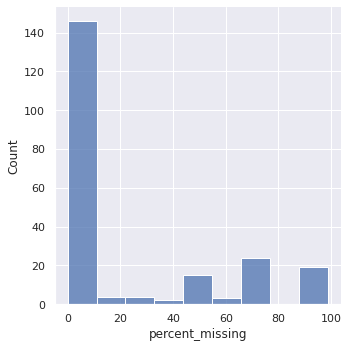

In [42]:
import seaborn as sns
sns.set_theme()

sns.displot(missing_value_df, x='percent_missing')

### Get Categorical Variables

In [ ]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_colwidth', 20)

missing_value_dfs = missing_value_df.style.set_properties(**{'text-align': 'left'})
missing_value_dfs

### Impute Missing Values